In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import the necessary python files and load your dataset as a Pandas DataFrame

In [2]:
from EstimateEffect import *

df = load_from_txt('/Users/shamanthk/Documents/eval-dowhy-caunex/datasets/sachs.2005.continuous.txt')
labels = df.columns
df.head()

/Users/shamanthk/.pyenv/versions/3.10.14/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,raf,mek,plc,pip2,pip3,erk,akt,pka,pkc,p38,jnk
0,26.4,13.2,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.9,40.0
1,35.9,16.5,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.5,61.5
2,59.4,44.1,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.9,19.5
3,73.0,82.8,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.6,23.1
4,33.7,19.8,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.7,81.3


### Create an instance of the `EstimateEffect` model

In [3]:
cm_pipe = EstimateEffect(df)

### Discover the causal graph using `find_causal_graph()`

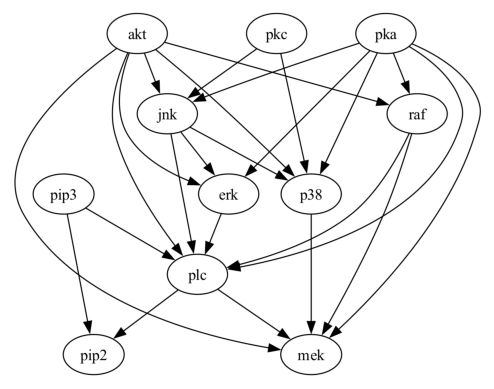

In [4]:
# We should first discover a causal graph
causal_graph = cm_pipe.find_causal_graph()

# display our causal graph
disp_graph_nx(causal_graph)

### Refute the causal graph using `refute_cgm()`

Test permutations of given graph: 100%|██████████| 100/100 [04:14<00:00,  2.55s/it]


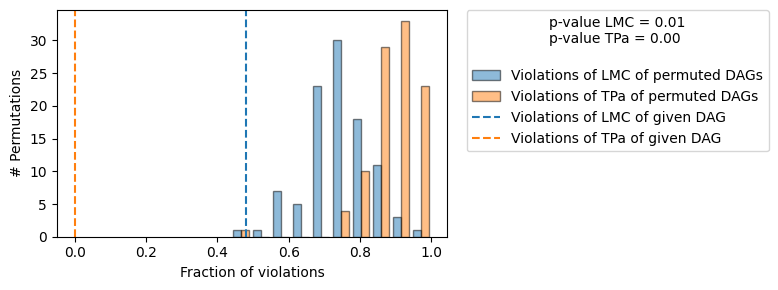

In [5]:
# Let us now refute the graph and check to see if there is no statistical concern between the data and the graph itself

causal_graph = cm_pipe.refute_cgm(n_perm=100, show_plt=True)

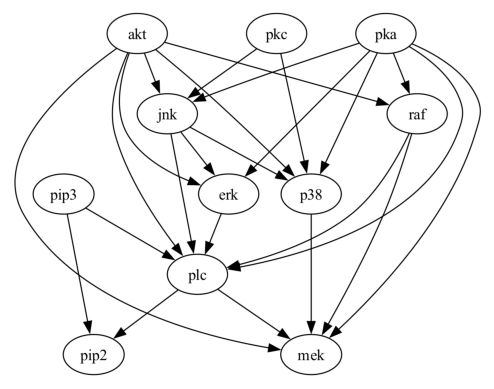

In [6]:
#  We should also visualize the new graph after applying the suggestions from the refutation results

disp_graph_nx(cm_pipe.graph)

### Create a DoWhy model to perform further analysis using `create_model`
### Identify an estimand expression using `identify_effect()`

In [7]:
# We should now create a model that DoWhy can understand

cm_pipe.create_model(treatment='pka', outcome='pip2')

# Now, let us identify the effect

cm_pipe.identify_effect()

### Estimate the effect using the identified estimand with `estimate_effect()`

In [8]:
cm_pipe.estimate_effect()

In [9]:
cm_pipe.estimate

### Refute the estimate value using `refute_estimate()`

In [10]:
cm_pipe.refute_estimate(placebo_type="permute")

In [13]:
info = cm_pipe.get_all_information()
info

{'graph': <networkx.classes.digraph.DiGraph at 0x173e60040>,
 'graph_refutation_res': +-------------------------------------------------------------------------------------------------------+
 |                                         Falsificaton Summary                                          |
 +-------------------------------------------------------------------------------------------------------+
 | The given DAG is informative because 0 / 100 of the permutations lie in the Markov                    |
 | equivalence class of the given DAG (p-value: 0.00).                                                   |
 | The given DAG violates 23/48 LMCs and is better than 99.0% of the permuted DAGs (p-value: 0.01).      |
 | Based on the provided significance level (0.05) and because the DAG is informative,                   |
 | we do not reject the DAG.                                                                             |
 +---------------------------------------------------------

In [18]:
info['graph_refutation_res'].suggestions

In [22]:
print(info['estimand_expression'])

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d            
──────(E[pip₂])
d[pka]         
Estimand assumption 1, Unconfoundedness: If U→{pka} and U→pip2 then P(pip2|pka,,U) = P(pip2|pka,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [23]:
print(info['effect_estimate'])

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d            
──────(E[pip₂])
d[pka]         
Estimand assumption 1, Unconfoundedness: If U→{pka} and U→pip2 then P(pip2|pka,,U) = P(pip2|pka,)

## Realized estimand
b: pip2~pka+pka*pip3+pka*pkc+pka*akt
Target units: 

## Estimate
Mean value: -0.08018573440909904
p-value: [2.90246638e-66]
95.0% confidence interval: (-0.09428726162539647, -0.0510321750829803)
### Conditional Estimates
__categorical__pip3  __categorical__pkc  __categorical__akt
(0.999, 8.06]        (0.999, 3.05]       (0.999, 20.7]        -0.119527
                                         (20.7, 31.3]         -0.118742
                                         (31.3, 45.7]         -0.117170
                                         (45.7, 91.4]         -0.114642
                                         (91.4, 3555.0]       -0.100031
                                  

In [24]:
print(info['estimate_refutation_res'])

Refute: Use a Placebo Treatment
Estimated effect:-0.08018573440909904
New effect:0.0021814199337836728
p value:0.78

